Prediction  Of The  Sales  Of  The  Stores  Using  Machine  Learning Regression Algorithms



Importing necessary libraries

In [ ]:
import numpy as np # For mathematical calculations
import pandas as pd # for creating dataframe
import matplotlib.pyplot as plt # Used for graph visualization
import seaborn as sb  # Used for graph visualization
import warnings  # Ignpre warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing  # Used for data cleaning
from sklearn.preprocessing import LabelEncoder # Used for label encoding
from sklearn.model_selection import train_test_split # used for train_test_split
from sklearn.preprocessing import StandardScaler # Used for scaling
from sklearn.metrics import confusion_matrix # used to draw a confusion matrix
from sklearn.metrics import precision_score, recall_score , accuracy_score # Used for calculating score
from sklearn.tree import DecisionTreeClassifier # Used for making model
from sklearn.tree import DecisionTreeRegressor # Used for making model
from sklearn.metrics import recall_score # calculate recall score
from sklearn.metrics import f1_score # calculate f1 score
from sklearn.metrics import accuracy_score # calculate accuracy score
from sklearn.metrics import precision_score # calculate precision_score
from sklearn.metrics import mean_squared_error # for calculation of MSE value
from sklearn.metrics import mean_absolute_error # for calculation mae value

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Python_CSV files/

/content/drive/My Drive/Python_CSV files


Loading The Dataset

In [ ]:
df=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv") # Used for reading  the csv file

In [ ]:
df.head() # Retrieves the first 5 rows from the dataframe

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape # Used for checking the number of rows and columns in the dataframe

(14204, 12)

In [ ]:
df.dtypes # Used for checking the datatypes of attributes in the dataframe

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.columns # Used for checking the columns in the dataframe

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.info # Used to check the information of whole dataframe.

<bound method DataFrame.info of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15         9.30          Low Fat         0.016047   
1               DRC01         5.92          Regular         0.019278   
2               FDN15        17.50          Low Fat         0.016760   
3               FDX07        19.20          Regular         0.074402   
4               NCD19         8.93          Low Fat         0.064299   
...               ...          ...              ...              ...   
14199           FDB58        10.50          Regular         0.013496   
14200           FDD47         7.60          Regular         0.142991   
14201           NCO17        10.00          Low Fat         0.073529   
14202           FDJ26        15.30          Regular         0.064709   
14203           FDU37         9.50          Regular         0.104720   

                   Item_Type  Item_MRP Outlet_Identifier  \
0                      Dairy  249.8092     

Checking For Null values in the dataset

In [ ]:
df.isnull().sum() # Used for checking the null values in the dataset

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Interpretation:

Here we found that Item_Outlet_Sales contains 5681 missing values.

In order to remove those missing values we have to perform missing value treatment 

Missing Values Treatment

In [ ]:
#df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean()) # used to replace missing value by taking the mean

In [ ]:
df=df.dropna()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Interpretation:

So here we find that there are no missing values present in the dataset 

As we have performed missing value treatment on that particular column in which the missing values were present.

In [ ]:
df.describe() # Used to get mean,meadian,mode,max,min of all numerical data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873623,0.070479,140.992782,1997.831867,2181.288914
std,4.645893,0.048761,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.785000,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Item_Weight is numerical column so we fill it with Mean Imputation

In [ ]:
df['Item_Weight'].describe()

count    8523.000000
mean       12.873623
std         4.645893
min         4.555000
25%         8.785000
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
df.dtypes # Checking the datatype of each column

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

1.1)Univariate Analysis:

Univariate Analysis is used to check correlation considering only single column in the dataset

Analyzing each features using graph.

Univariate Analysis on categorical columns

In [ ]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

Analysis of Item_Fat_Content  

In [ ]:
info_of_cat("Item_Fat_Content") #function returns all the information required for the level 1 analysis

Unique values in Item_Fat_Content are: ['Low Fat' 'Regular']
Mode of Item_Fat_Content is Low Fat
Number of missing values in Item_Fat_Content is 0


([<matplotlib.patches.Wedge at 0x7f29e1d165e0>,
 [Text(-0.49108062250385487, 0.9842966129176849, 'Low Fat'),
  Text(0.4910806225038548, -0.9842966129176849, 'Regular')],
 [Text(-0.2678621577293753, 0.5368890615914644, '64.73%'),
  Text(0.2678621577293753, -0.5368890615914644, '35.27%')])

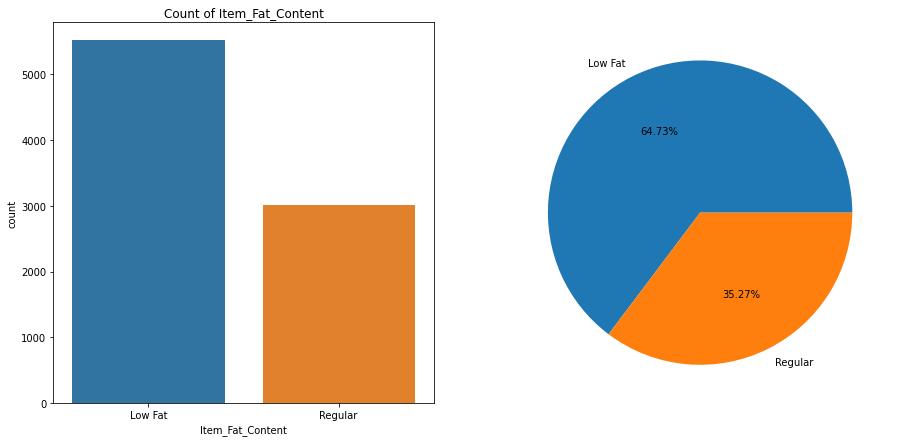

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Item_Fat_Content")                  # Set the title of the graph
percentage = df["Item_Fat_Content"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Item_Fat_Content"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Item_Fat_Content"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

1)Item_Fat_Content which consist of two features: Low Fat and Regular

2) From the pie chart and countplot we can notice that low fat content food products are sold most as compared to the regular food products.

3) So from the analysis we can make out that customers prefer to buy more low fat content food products as compared to regular food products.

4) Low fat content food products should be more recommended to the customers in order to increase the sales of the stores.


Analysis of Item_Type  

In [ ]:
info_of_cat("Item_Type") #function returns all the information required for the level 1 analysis

Unique values in Item_Type are: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode of Item_Type is Fruits and Vegetables
Number of missing values in Item_Type is 0


([<matplotlib.patches.Wedge at 0x7f29e1820910>,
 [Text(0.9885134290668446, 0.4825362168319687, 'Fruits and Vegetables'),
  Text(0.24030971243089047, 1.0734296633274967, 'Snack Foods'),
  Text(-0.5819825343166728, 0.9334325523305597, 'Household'),
  Text(-1.0285786969861261, 0.3899049423979169, 'Frozen Foods'),
  Text(-1.077062377695873, -0.22346506338153288, 'Dairy'),
  Text(-0.8447302131430985, -0.7045785030805407, 'Canned'),
  Text(-0.42586341218777557, -1.0142190858782856, 'Baking Goods'),
  Text(0.03628228530275769, -1.099401471607715, 'Health and Hygiene'),
  Text(0.4168746716474865, -1.0179467118365286, 'Soft Drinks'),
  Text(0.716494856094164, -0.83464670441487, 'Meat'),
  Text(0.900194282333554, -0.6321789731191458, 'Breads'),
  Text(0.994829306903044, -0.46937687429911723, 'Hard Drinks'),
  Text(1.0509763124562066, -0.3247287955447658, 'Others'),
  Text(1.0816671190247293, -0.19999060883137015, 'Starchy Foods'),
  Text(1.0957698794777586, -0.0963761963832281, 'Breakfast'),
  T

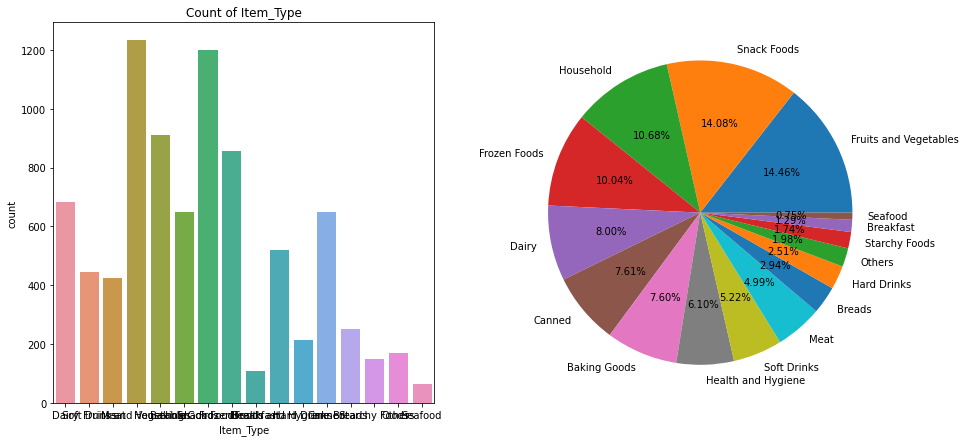

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Item_Type")                  # Set the title of the graph
percentage = df["Item_Type"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Item_Type"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Item_Type"], ax = ax[0],order=['Dairy','Soft Drinks','Meat','Fruits and Vegetables','Household',
 'Baking Goods','Snack Foods','Frozen Foods','Breakfast',
 'Health and Hygiene','Hard Drinks','Canned','Breads','Starchy Foods',
 'Others','Seafood'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

From the pie chart and countplot we understand that out of the total food products

1) 14% customers wish to buy snack food

2) 14.17% customers wish to buy fruits and vegetables

3) 10.90% customers wish to buy household products

4) 10.04% customers wish to buy frozen food

5) 8% customers wish to buy dairy products

6) 7.65% customers wish to buy baking goods

7) 7.63% customers wish to buy canned

8) 6.04% customers wish to buy health and hygiene products

9) 5.18% customers wish to buy meat

10) 5.11% customers wish to buy soft drinks

11) 2.93% customers wish to buy breads

12) 2.55% customers wish to buy hard drinks

13) 1.89% customers wish to buy starchy food

14) 1.21% customers wish to buy breakfast 

15) 0.63% customers wish to buy seafood

16) 1.97% are other

So from the above analysis we can focus to recommend products like fruits and vegetables, household, snack foods, frozen foods in order to increase the sales of the stores

Analysis of Outlet_Identifier

In [ ]:
info_of_cat("Outlet_Identifier") #function returns all the information required for the level 1 analysis

Unique values in Outlet_Identifier are: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Mode of Outlet_Identifier is OUT027
Number of missing values in Outlet_Identifier is 0


([<matplotlib.patches.Wedge at 0x7f29dfe64850>,
 [Text(1.0353158826953575, 0.3716463682571552, 'OUT027'),
  Text(0.5636371939712413, 0.9446232654197255, 'OUT013'),
  Text(-0.1626003501822241, 1.0879159554490494, 'OUT049'),
  Text(-0.8146589488220127, 0.7391419329900134, 'OUT046'),
  Text(-1.0985565152427912, 0.056334561484183455, 'OUT035'),
  Text(-0.8862341830911599, -0.6516049207309171, 'OUT045'),
  Text(-0.27460341022002466, -1.065172740495894, 'OUT018'),
  Text(0.4596371754121952, -0.9993666329126158, 'OUT017'),
  Text(0.9116918357586955, -0.6154819222454384, 'OUT010'),
  Text(1.0792329826356122, -0.21273497406736053, 'OUT019')],
 [Text(0.5647177541974676, 0.20271620086753916, '10.97%'),
  Text(0.3074384694388589, 0.5152490538653048, '10.94%'),
  Text(-0.08869110009939495, 0.5934087029722087, '10.91%'),
  Text(-0.44435942663018874, 0.4031683270854618, '10.91%'),
  Text(-0.599212644677886, 0.030727942627736426, '10.91%'),
  Text(-0.4834004635042689, -0.35542086585322746, '10.90%'),


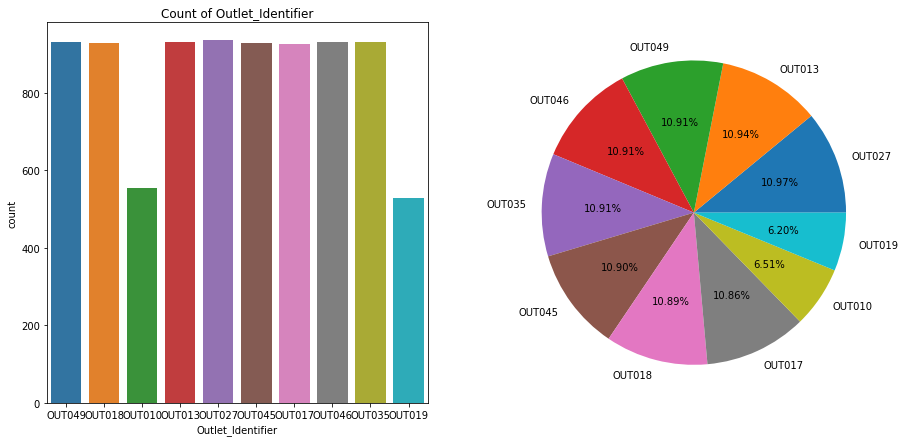

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet_Identifier")                  # Set the title of the graph
percentage = df["Outlet_Identifier"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Identifier"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Outlet_Identifier"], ax = ax[0],order=['OUT049','OUT018','OUT010','OUT013','OUT027','OUT045','OUT017','OUT046','OUT035','OUT019'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation

There are ten stores that have been identified from the graph.

Here, two of the outlets(OUT010 and OUT019) have lesser sales. 

The highest sales is at OUT027. 

Analysis of Outlet_Size  

In [ ]:
info_of_cat("Outlet_Size") #function returns all the information required for the level 1 analysis

Unique values in Outlet_Size are: ['Medium' 'High' 'Small']
Mode of Outlet_Size is Small
Number of missing values in Outlet_Size is 0


([<matplotlib.patches.Wedge at 0x7f29dfdbba30>,
 [Text(0.007500971224396993, 1.0999744248984569, 'Small'),
  Text(-0.377555332427641, -1.03317567284342, 'Medium'),
  Text(1.0357262343441844, -0.37050123817770975, 'High')],
 [Text(0.004091438849671086, 0.5999860499446128, '49.78%'),
  Text(-0.2059392722332587, -0.5635503670055018, '39.28%'),
  Text(0.564941582369555, -0.20209158446056893, '10.94%')])

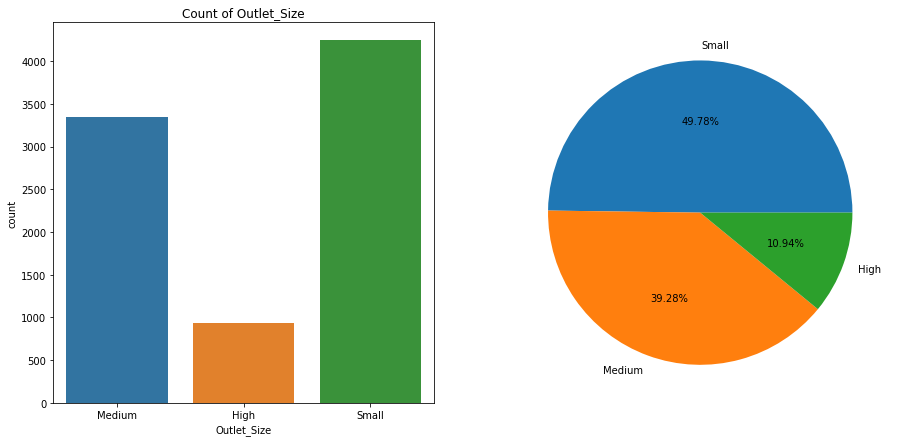

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet_Size")                  # Set the title of the graph
percentage = df["Outlet_Size"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Size"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Outlet_Size"], ax = ax[0],order=['Medium','High','Small'])
plt.pie(percentage,labels = labels, autopct= "%0.02f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

From the above graph it is seen that Medium and small size stores are preferred more rather than the High sized stores.

Analysis of Outlet_Location_Type  

In [ ]:
info_of_cat("Outlet_Location_Type") #function returns all the information required for the level 1 analysis

Unique values in Outlet_Location_Type are: ['Tier 1' 'Tier 3' 'Tier 2']
Mode of Outlet_Location_Type is Tier 3
Number of missing values in Outlet_Location_Type is 0


([<matplotlib.patches.Wedge at 0x7f29dfd57a00>,
 [Text(0.36266446547093334, 1.03849626166139, 'Tier 3'),
  Text(-1.0315659207596939, -0.3819316053002228, 'Tier 2'),
  Text(0.7006790317242327, -0.8479675079282176, 'Tier 1')],
 [Text(0.1978169811659636, 0.5664525063607582, '39.31%'),
  Text(-0.5626723204143784, -0.20832633016375787, '32.68%'),
  Text(0.38218856275867236, -0.4625277315972095, '28.02%')])

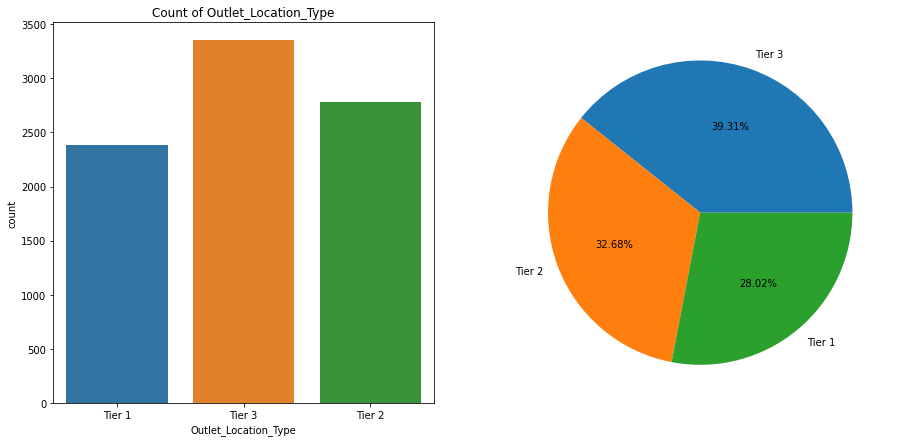

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet_Location_Type")                  # Set the title of the graph
percentage = df["Outlet_Location_Type"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Location_Type"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Outlet_Location_Type"], ax = ax[0],order= ['Tier 1','Tier 3','Tier 2'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

The highest sales is that of Tier 2 followed by Tier 3 and Tier 1.

Analysis of Outlet_Type 

In [ ]:
info_of_cat("Outlet_Type") #function returns all the information required for the level 1 analysis

Unique values in Outlet_Type are: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Mode of Outlet_Type is Supermarket Type1
Number of missing values in Outlet_Type is 0


([<matplotlib.patches.Wedge at 0x7f29dfc7c3a0>,
 [Text(-0.5127275930542571, 0.9731959799140091, 'Supermarket Type1'),
  Text(-0.22048660527398525, -1.0776760445025926, 'Grocery Store'),
  Text(0.5674626423181808, -0.9423301701491196, 'Supermarket Type3'),
  Text(1.0362713621111401, -0.3689737986203392, 'Supermarket Type2')],
 [Text(-0.2796695962114129, 0.5308341708621866, '65.43%'),
  Text(-0.1202654210585374, -0.5878232970014141, '12.71%'),
  Text(0.3095250776280986, -0.5139982746267924, '10.97%'),
  Text(0.5652389247878945, -0.2012584356110941, '10.89%')])

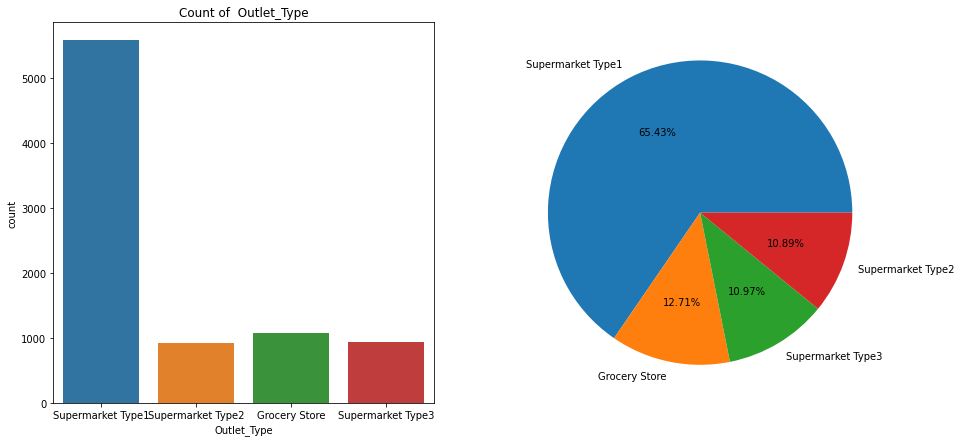

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of  Outlet_Type")                  # Set the title of the graph
percentage = df["Outlet_Type"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Type"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Outlet_Type"], ax = ax[0],order= ['Supermarket Type1','Supermarket Type2','Grocery Store','Supermarket Type3'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

The results from univariate analysis of Outlet_Type and the bivariate analysis both show that Grocery Store has lesser outlet sales followed by Supermarket Type1 and Supermarket Type2.

Analysis on numeric columns

In [ ]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

Analysis on Item_Visibility

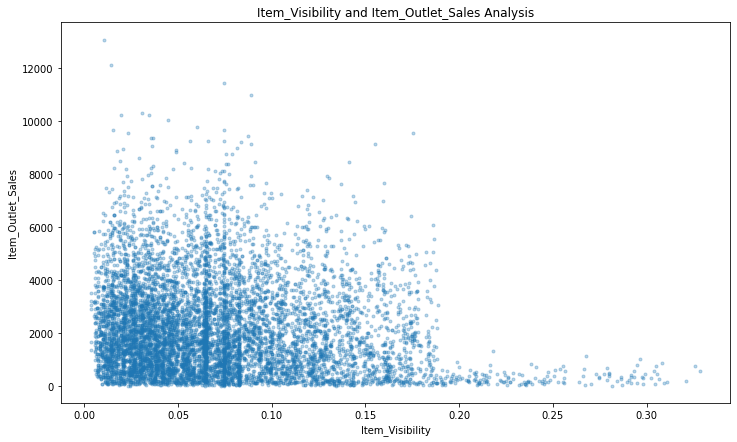

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(df.Item_Visibility, df['Item_Outlet_Sales'],'.',alpha=0.3)

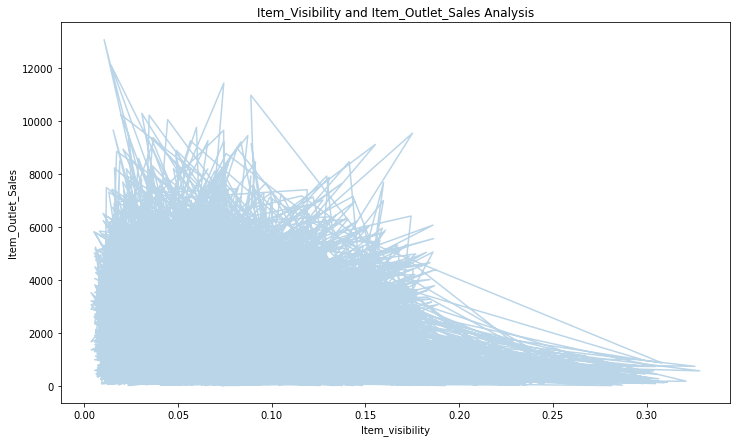

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
plt.plot(df.Item_Visibility,df['Item_Outlet_Sales'],alpha=0.3)

Interpretation:

The location of product in a store will impact the sales.Ones which are kept at the entrance will catch the customers attention rather than the ones in back.

This was the assumption from above.However,first the correlation and now this plot, indicate that the more visible a product is the less higher its sales will be.

This might be due to the fact that a great number of daily used products, which do not need high visibility, control the top of the sales chart.

Analysis on Item_MRP 

In [ ]:
info_of_numerical("Item_MRP")

The mean of the Item_MRP is 140.9927819781767
The median of the Item_MRP is 143.0128
The mode of the Item_MRP is 172.0422
The standard deviation of the Item_MRP is 62.27506651219046
Number of missing values in the Item_MRP is 0


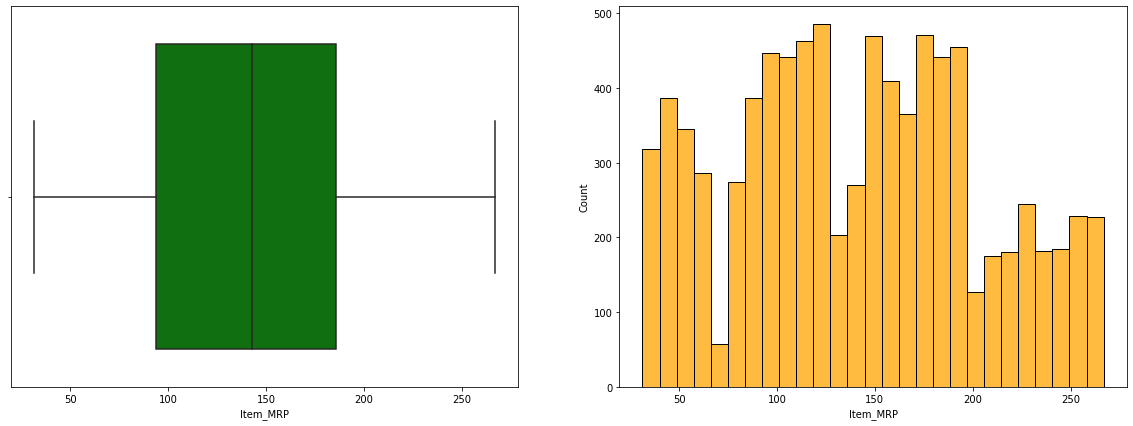

In [ ]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sb.histplot(x = df["Item_MRP"], ax =ax[1], color = "orange") # ax[1] means image will plot at the second space
sb.boxplot(x = df["Item_MRP"], ax = ax[0], color = "green") # ax[0] means image will plot at the second space
plt.show()

Interpretation:

From the histogram and boxplot we can make out that products whose MRP ranges between Rs.100 to 150 are sold more as compared to other products.

Means that Majority of people buy the products in this range.

So we can recommend only those specific products that can lead to increase the sales of the stores

Analysis on Outlet_Establishment_Year  

In [ ]:
info_of_numerical("Outlet_Establishment_Year")

The mean of the Outlet_Establishment_Year is 1997.8318667135984
The median of the Outlet_Establishment_Year is 1999.0
The mode of the Outlet_Establishment_Year is 1985
The standard deviation of the Outlet_Establishment_Year is 8.371760408092655
Number of missing values in the Outlet_Establishment_Year is 0


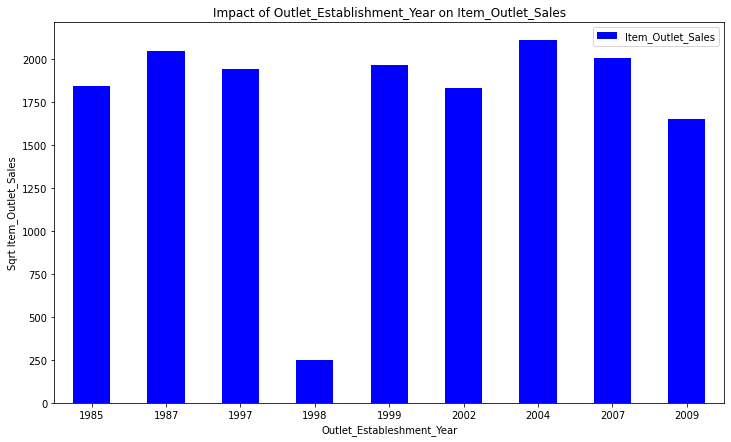

In [ ]:
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Outlet_Establishment_Year', values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("Outlet_Estableshment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Interpretation:

From the bar chart it is seen that the year 1998 has the lowest sales.It is also analyzed that there seems to be no significance between the year of establishment and Sales as the variables are independent of each other.

Feature Engineering

Converting non-numeric(object) label to category  

In [ ]:
df['Item_Identifier']=df['Item_Identifier'].astype('category')
df['Item_Fat_Content']=df['Item_Fat_Content'].astype('category')
df['Item_Type']=df['Item_Type'].astype('category')
df['Outlet_Identifier']=df['Outlet_Identifier'].astype('category')
df['Outlet_Size']=df['Outlet_Size'].astype('category')
df['Outlet_Location_Type']=df['Outlet_Location_Type'].astype('category')
df['Item_Identifier']=df['Item_Identifier'].astype('category')
df['Outlet_Type']=df['Outlet_Type'].astype('category')

In [ ]:
df.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

Interpretation:

Here as we can see that we have converted all the non-numeric label to categoical label.

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

Correlation between numerical and target variables

In [ ]:
corr = numeric_features.corr() # Use to check correlation between numeric and target variable
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018409,0.026172,-0.012823,0.013261
Item_Visibility,-0.018409,1.000000,-0.005861,-0.080598,-0.135247
Item_MRP,0.026172,-0.005861,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.012823,-0.080598,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013261,-0.135247,0.567574,-0.049135,1.000000


In [ ]:
print(corr['Item_Outlet_Sales'].sort_values(ascending=False))

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.013261
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.135247
Name: Item_Outlet_Sales, dtype: float64


Correlation matrix generation

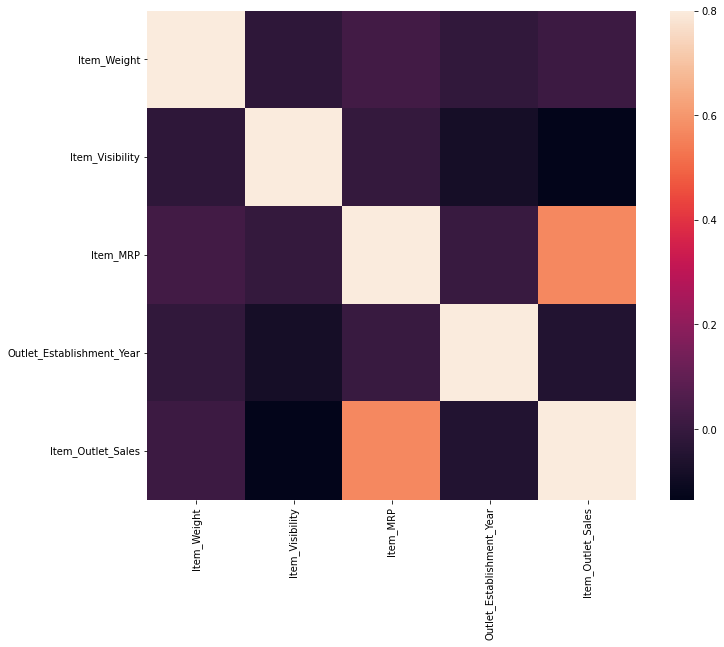

In [ ]:
f,ax=plt.subplots(figsize=(12,9))
sb.heatmap(corr, vmax=.8,square=True)

Interpretation:

From the current numeric variables we can observe that the Item_Visibility is the feature with the lowest correlation with our target variable.

Therefore, the less visible the product is in the store the higher the price will be.

Further,the most positive correlation is that of Item_MRP.

Creation of dummy variables: Convert categorical data to numbers

In [ ]:
# Encoding all the categorical features
cat_attr_list = ['Item_Identifier','Item_Fat_Content',
                 'Item_Type','Outlet_Identifier',
                 'Outlet_Size','Outlet_Location_Type','Outlet_Type']

numeric_feature_cols = ['Item_Weight','Item_Visibility','Item_MRP',
                        'Outlet_Establishment_Year','Item_Outlet_Sales']


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()
df['Item_Fat_Content']=label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Identifier']=label_encoder.fit_transform(df['Item_Identifier'])
df['Item_Type']=label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=label_encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=label_encoder.fit_transform(df['Outlet_Type'])

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Splitting our data into train and test

In [ ]:
# Creating test and training dataset

df_train,df_test = train_test_split(df,train_size=0.8)

print("Size of the training dataset",df_train.shape)
print("Size of the testing dataset",df_test.shape)

Size of the training dataset (6818, 12)
Size of the testing dataset (1705, 12)


In [ ]:
x_train = df_train.drop(columns='Item_Outlet_Sales',axis=1)
y_train = df_train['Item_Outlet_Sales']
x_test = df_test.drop(columns='Item_Outlet_Sales',axis=1)
y_test = df_test['Item_Outlet_Sales']
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((6818, 11), (6818,), (1705, 11), (1705,))

Model Building Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Training the model

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([2526.93860753, 2864.60938772,  602.26645179, ..., 2704.16940998,
       2306.94480933,  862.1401215 ])

Evaluating the performance of the model

In [ ]:
#Evaluate the model on the test data

model.score(x_test,y_test)

0.4855460149993043

In [ ]:
#model.intercept indicates the intercecpt with y-axis

model.intercept_

7915.329734799273

In [ ]:
from math import sqrt

In [ ]:
# Calculating RMSE score 
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

1236.949354346512


In [ ]:
# Calculating MSE score
mse = mean_squared_error(y_test,y_pred)
print(mse)

1530043.7052182534


Calculating r2_score

In [ ]:
model.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(model.score(x_test,y_test)))

model.fit(x_test,y_test)   
print("R-Squaredon test dataset={}".format(model.score(x_test,y_test)))

R-Squared on train dataset=0.4855460149993043
R-Squaredon test dataset=0.4923556967454268


Modeling DecisionTreeRegressor

In [ ]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_test,y_test)))

dtm.fit(x_test,y_test)   
print("R-Squaredon test dataset={}".format(dtm.score(x_test,y_test)))

R-Squared on train dataset=0.5662047748923439
R-Squaredon test dataset=0.5805567869628294


Training the model

In [ ]:
y_pred2 = dtm.predict(x_test)
y_pred2

array([2774.49675025, 2774.49675025,  892.18057253, ..., 2774.49675025,
       2024.61276576,  892.18057253])

Evaluating the performance of the model

In [ ]:
#Evaluate the model on the test data

dtm.score(x_test,y_test)

0.5805567869628294

In [ ]:
# Calculating RMSE score 
rmse = sqrt(mean_squared_error(y_test, y_pred2))
print(rmse)

1116.9024309224


In [ ]:
# Calculating MSE score
mse = mean_squared_error(y_test,y_pred2)
print(mse)

1247471.0402003666


Modelling Bayesian-Regression

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

Creating and training model

In [ ]:
model3 = BayesianRidge()
model3.fit(x_train, y_train)

BayesianRidge()

Model making a prediction on test data

In [ ]:
# Model making a prediction on test data
prediction = model3.predict(x_test)

Evaluating the performance of the model

In [ ]:
#Evaluate the model on the test data

model3.score(x_test,y_test)

0.4856731085481557

In [ ]:
# Calculating RMSE score 
rmse = sqrt(mean_squared_error(y_test,prediction))
print(rmse)

1236.7965535145845


In [ ]:
# Calculating MSE score
mse = mean_squared_error(y_test,prediction)
print(mse)

1529665.7147855547


Calculating r2_score

In [ ]:
model3.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(model3.score(x_test,y_test)))

model3.fit(x_test,y_test)   
print("R-Squaredon test dataset={}".format(model3.score(x_test,y_test)))

R-Squared on train dataset=0.4856731085481557
R-Squaredon test dataset=0.49126736549342787


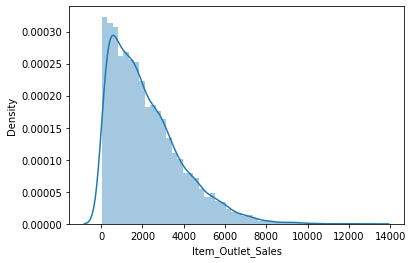

In [ ]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
 
# plotting histogram and density
# plot for carat using distplot()
sns.distplot(df.Item_Outlet_Sales)
# visualizing plot using matplotlib.pyplot library
plt.show()

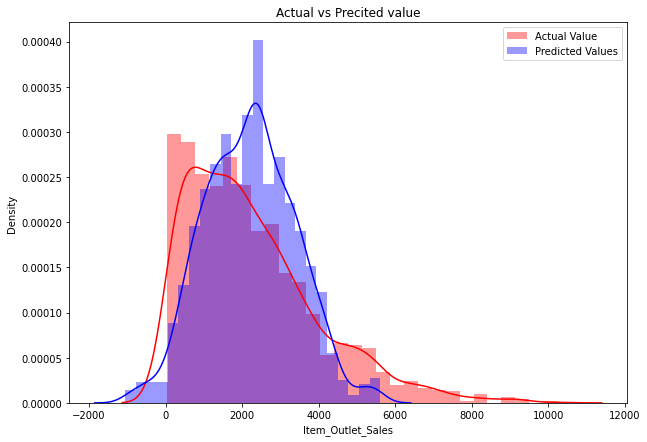

In [ ]:
plt.figure(figsize=(10, 7))
ax = sns.distplot(y_test, hist=True, color="r", label="Actual Value")
sns.distplot(y_pred, hist=True, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value')
plt.legend()
plt.show()

Conclusion: From the above model comparison DecisonTreeReressor performs better in terms the rmse,mse parameters.